In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.logistic_regression import LogisticRegression

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH
config.ZERO_ONE = True

#### Load data and preprocess

In [4]:
data = DataClass(config)
df, data_dict, encoders_dict = data.build()

2023-02-24 17:17:57,721 - hb_mep.data_access.core - INFO - Reading data ....
2023-02-24 17:17:57,726 - hb_mep.data_access.core - INFO - Processing data ...
2023-02-24 17:17:57,737 - hb_mep.utils.utils - INFO - func:build took: 0.02 sec


In [5]:
data_dict.keys()

dict_keys(['num_participants', 'num_segments', 'segments_per_participant', 'total_combinations', 'intensity', 'Biceps', 'participant', 'level'])

In [6]:
encoders_dict.keys()

dict_keys(['participant_encoder', 'segment_encoder'])

#### Initialize model

In [7]:
model = LogisticRegression(config)

#### Run MCMC inference

In [8]:
mcmc, posterior_samples = model.sample(data_dict=data_dict)

2023-02-24 17:18:12,149 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-02-24 17:18:12,150 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-24 17:18:12,150 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-24 17:18:12,151 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-02-24 17:18:12,151 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-02-24 17:18:12,204 - hb_mep.models.baseline - INFO - Running inference wit

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

#### Diagnostics

In [10]:
mcmc.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
                     a[0,0]      4.24      0.23      4.24      3.92      4.63     38.87      1.09
                     a[1,0]      2.91      0.21      2.93      2.55      3.25    347.49      1.01
                     a[2,0]      6.56      0.25      6.56      6.12      6.94    265.27      1.02
             a_global_scale      1.31      0.75      1.27      0.16      2.37     46.92      1.08
          a_level_mean[0,0]      3.24      1.37      3.71      0.69      5.05    257.19      1.02
          a_level_mean[1,0]      2.41      1.00      2.67      0.29      3.57    443.21      1.01
          a_level_mean[2,0]      4.44      2.22      5.05      0.64      7.09    126.50      1.03
  a_level_mean_global_scale      2.29      0.71      2.37      1.12      3.44    367.93      1.02
         a_level_scale[0,0]      1.28      1.18      0.87      0.03      2.95    129.59      1.03
         a_level_sc

#### Plot fitted curves

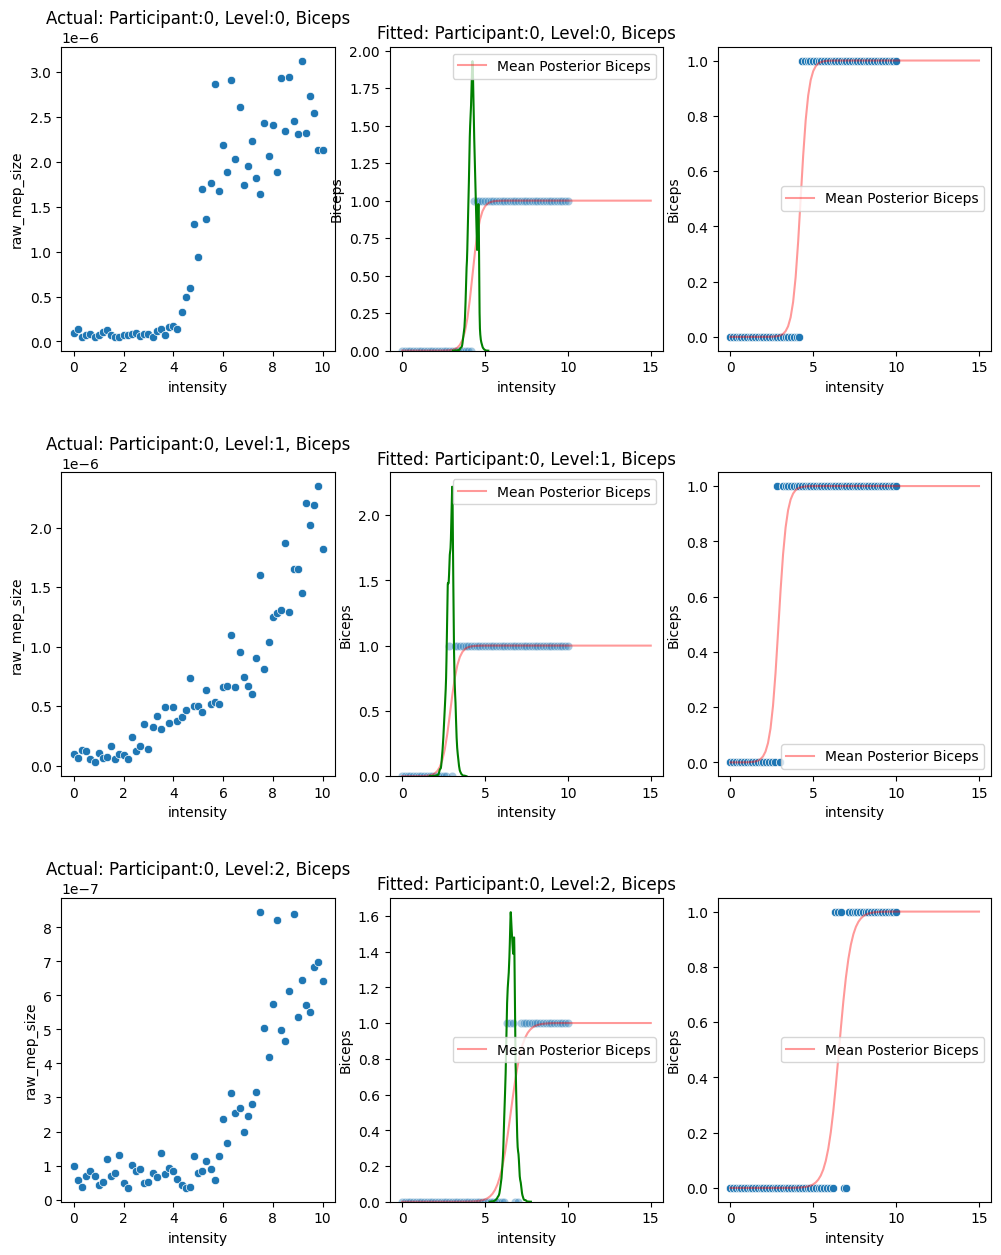

In [11]:
model.plot_fit(df=df, data_dict=data_dict, encoders_dict=encoders_dict, posterior_samples=posterior_samples);

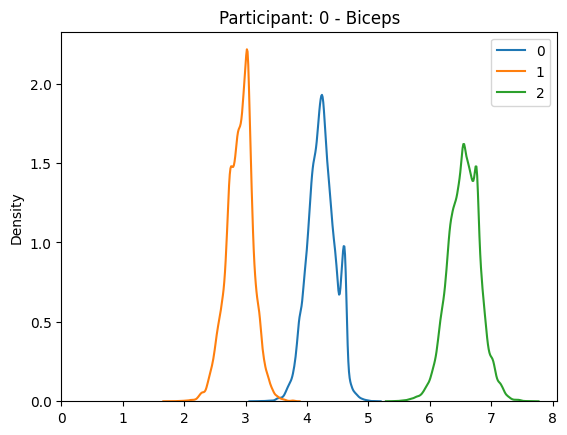

In [12]:
model.plot_kde(data_dict=data_dict, posterior_samples=posterior_samples);